In [3]:
import nltk
from nltk import Tree
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget

OP_MAP = ['+', '-', '*', '/']

In [4]:
etree = ((((((6, '*'), 5), '+'), 7), '+'), ((1, '/'), 9))

In [5]:
etree

((((((6, '*'), 5), '+'), 7), '+'), ((1, '/'), 9))

In [6]:
etree[1]

((1, '/'), 9)

In [43]:
def derive_etree(etree):
    if not isinstance(etree, tuple):
        return etree
    
    print(etree)
    l, r = etree
    n_l = derive_etree(l)
    n_r = derive_etree(r)
    
    v = -1
    if (isinstance(l, tuple) or isinstance(l, list)) and l[1] in OP_MAP:
        op = l[1]
        if not isinstance(n_l, int):
            n_l_label = n_l.label()
        else:
            n_l_label = n_l
            
        if not isinstance(n_r, int):
            n_r_label = n_r.label()
        else:
            n_r_label = n_r
            
        if isinstance(n_l_label, str):
            n_l_label = int(n_l_label[0])
        if isinstance(n_r_label, str):
            n_r_label = int(n_r_label[0])
            
        v1 = n_l_label
        v2 = n_r_label
        
        if op != '/':
            v = eval(''.join([str(v1), l[1], str(v2)]))
        else:
            v = v1 % v2
        v %= 10
    elif isinstance(l, int) and r in OP_MAP:
        v = str(l) + r
    else:
        v = str(n_l.label()) + r
    
    return Tree(v, [n_l, n_r])

In [44]:
t=derive_etree(etree)

((((8, '+'), ((((6, '*'), 3), '/'), 2)), '-'), 4)
(((8, '+'), ((((6, '*'), 3), '/'), 2)), '-')
((8, '+'), ((((6, '*'), 3), '/'), 2))
(8, '+')
((((6, '*'), 3), '/'), 2)
(((6, '*'), 3), '/')
((6, '*'), 3)
(6, '*')


In [45]:
etree = ((((8,'+'),(((((6,'*'),3),'/'),2))), '-'), 4)

In [46]:
etree[0]

(((8, '+'), ((((6, '*'), 3), '/'), 2)), '-')

In [47]:
etree[0][0]

((8, '+'), ((((6, '*'), 3), '/'), 2))

In [48]:
t=derive_etree(etree)

((((8, '+'), ((((6, '*'), 3), '/'), 2)), '-'), 4)
(((8, '+'), ((((6, '*'), 3), '/'), 2)), '-')
((8, '+'), ((((6, '*'), 3), '/'), 2))
(8, '+')
((((6, '*'), 3), '/'), 2)
(((6, '*'), 3), '/')
((6, '*'), 3)
(6, '*')


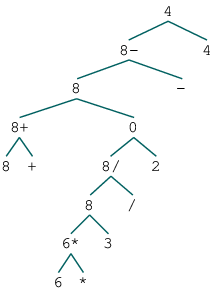

In [49]:
t

In [10]:
etree

((((((6, '*'), 5), '+'), 7), '+'), ((1, '/'), 9))

In [14]:
etree = (((('(', 2), '-'), 4),')')
derive_etree(etree)

AttributeError: 'str' object has no attribute 'label'

In [11]:
etree = ((8,'+'),(((((6, '*'), 3), '/'), ((((('(', 2), '-'), 4),')')))))

In [12]:
etree

((8, '+'), ((((6, '*'), 3), '/'), (((('(', 2), '-'), 4), ')')))

In [13]:
derive_etree(etree)

AttributeError: 'str' object has no attribute 'label'

In [113]:
etree = ((((((((((((((((((((2, '+'), 8), '-'), ((((5, '*'), 9), '/'), 3)), '-'),
               ((((((9, '/'), 7), '/'), 1), '/'), 4)),
              '-'),
             ((((((((9, '*'), 8), '/'), 4), '*'), 9), '*'), 2)),
            '-'),
           ((((((((((9, '/'), 2), '*'), 8), '/'), 4), '*'), 3), '/'), 5)),
          '+'),
         ((((((((((((3, '/'), 4), '*'), 2), '/'), 9), '/'), 7), '*'), 2), '/'),
          3)),
        '+'),
       ((4, '*'), 3)),
      '+'),
     ((((((((((((7, '/'), 7), '*'), 4), '*'), 8), '/'), 5), '*'), 6), '*'),
      2)),
    '+'),
   ((9, '/'), 4)),
  '+'),
 ((((8, '*'), 4), '*'), 8))

In [114]:
''.join((''.join((''.join((''.join((''.join((''.join(str(etree).split(')')).split('('))).split(',')))).split("\'")).split("\'"))).split(' ')))

'2+8-5*9/3-9/7/1/4-9*8/4*9*2-9/2*8/4*3/5+3/4*2/9/7*2/3+4*3+7/7*4*8/5*6*2+9/4+8*4*8'

In [115]:
t = derive_etree(etree)

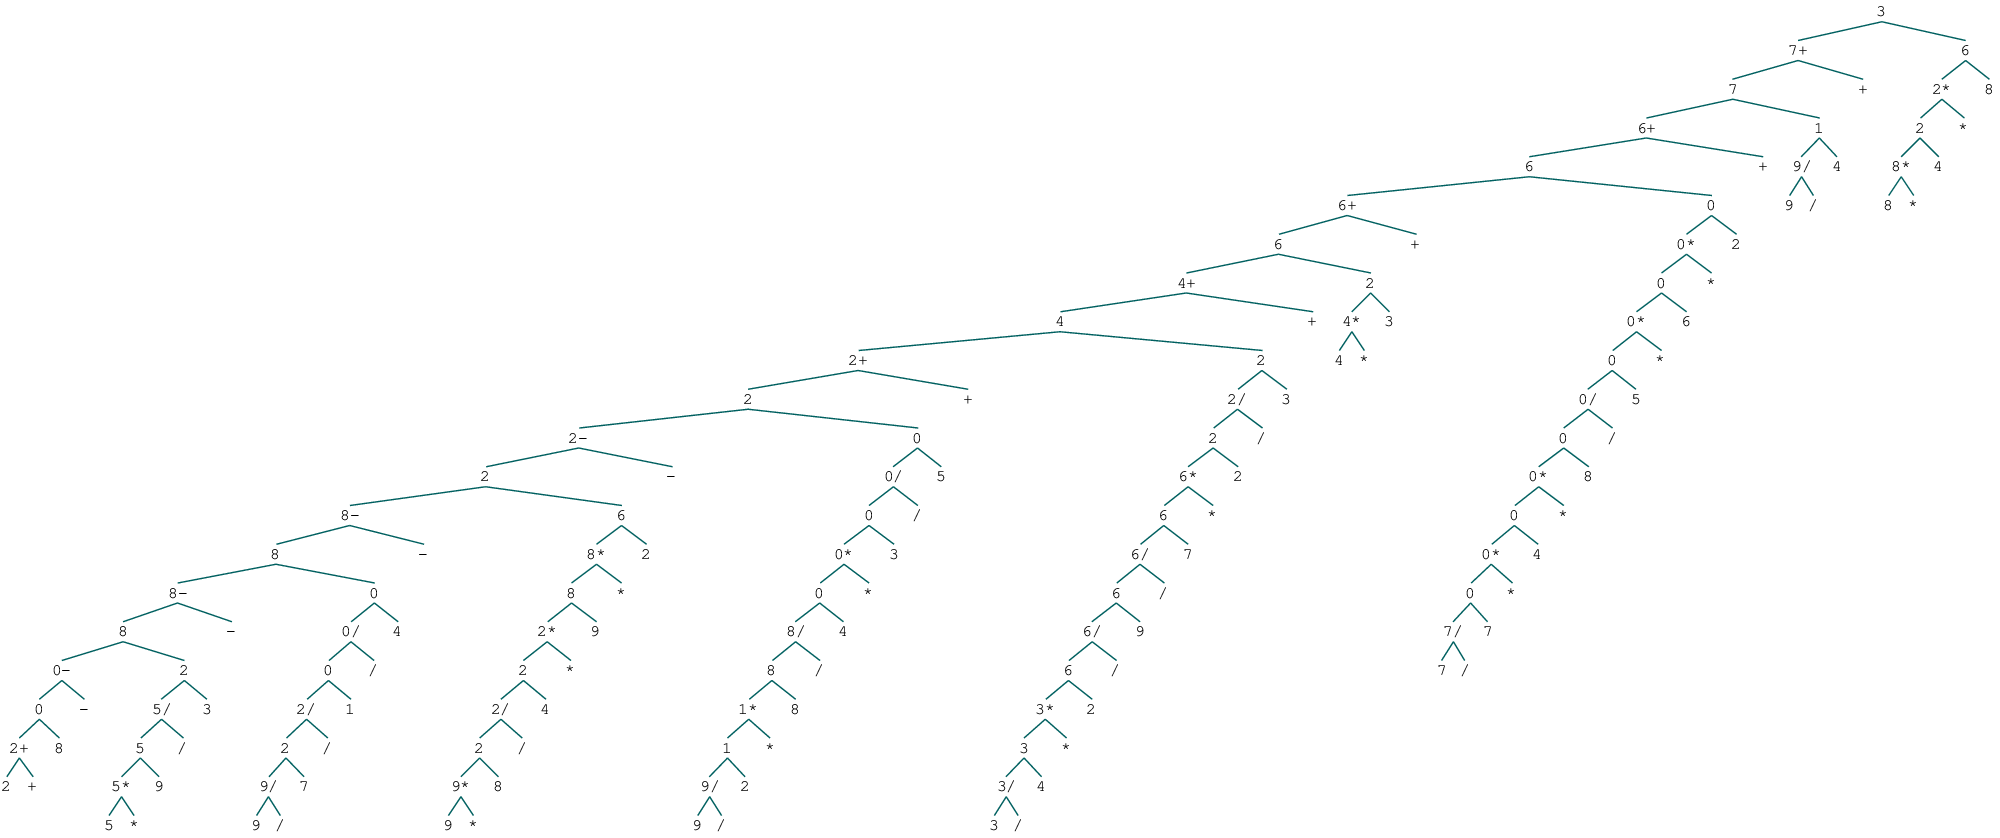

In [116]:
t

In [127]:
t = derive_etree(etree)

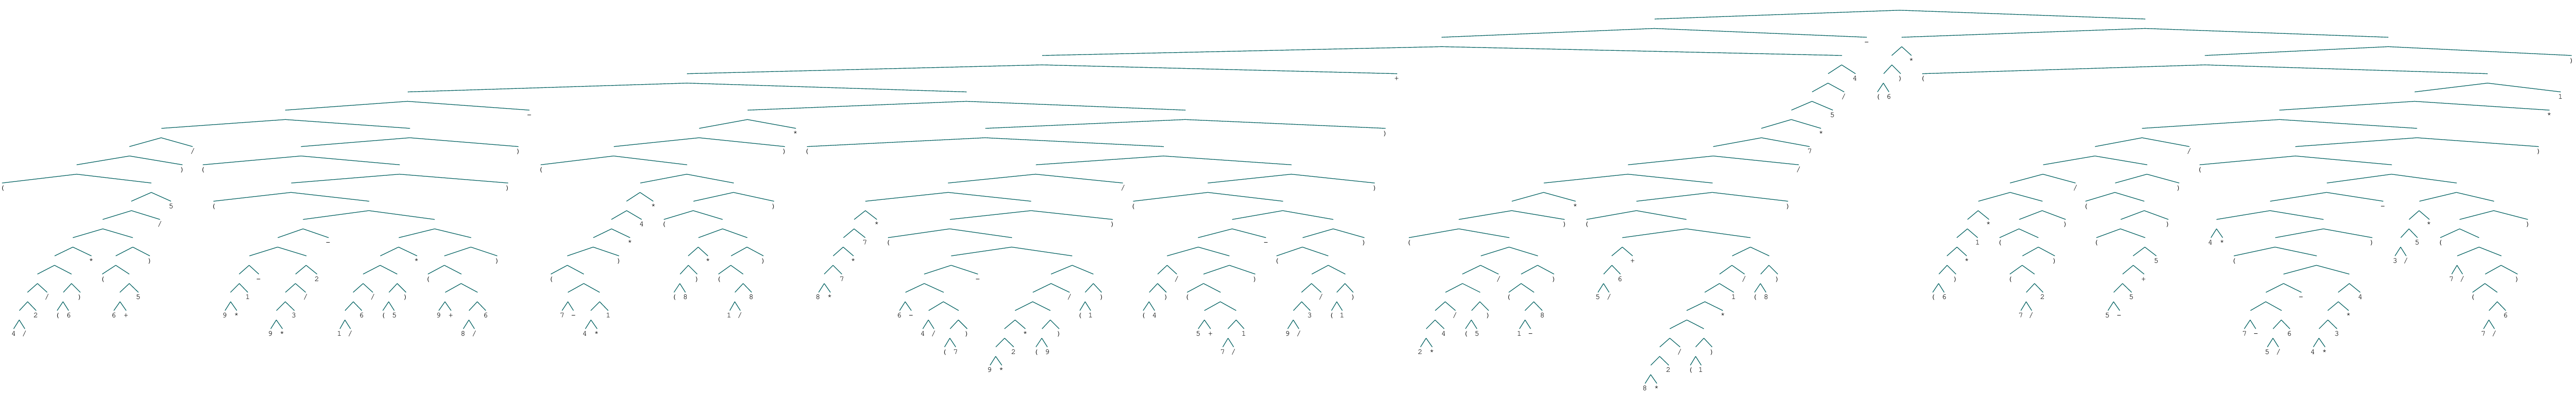

In [128]:
t

In [134]:
t=[[[[[[[['(', [[[[[[3, '*'], 3], '+'], 7], '+'], [[3, '*'], 3]]], ')'], '*'],
     5],
    '-'],
   [['(',
     [[[[[[[[[[[[5, '*'], 8], '/'], 9], '/'], 8], '/'], 2], '/'], 7], '+'],
      [[5, '-'],
       [[[[[[[[[[[[6, '*'], 5], '*'], [[7, '+'], 9]], '*'], 4], '*'], 3], '*'],
          [[7, '+'],
           [[[[8, '*'], 3], '-'], [[[[[[4, '/'], 2], '*'], 4], '*'], 6]]]],
         '*'],
        1]]]],
    ')']],
  '-'],
 [[[[[['(',
       [[[[4, '+'], [[8, '/'], 7]], '+'],
        [[[[5, '-'], [[8, '*'], 3]], '+'], [[[[4, '/'], 6], '/'], 4]]]],
      ')'],
     '/'],
    6],
   '*'],
  [['(', 2], ')']]]

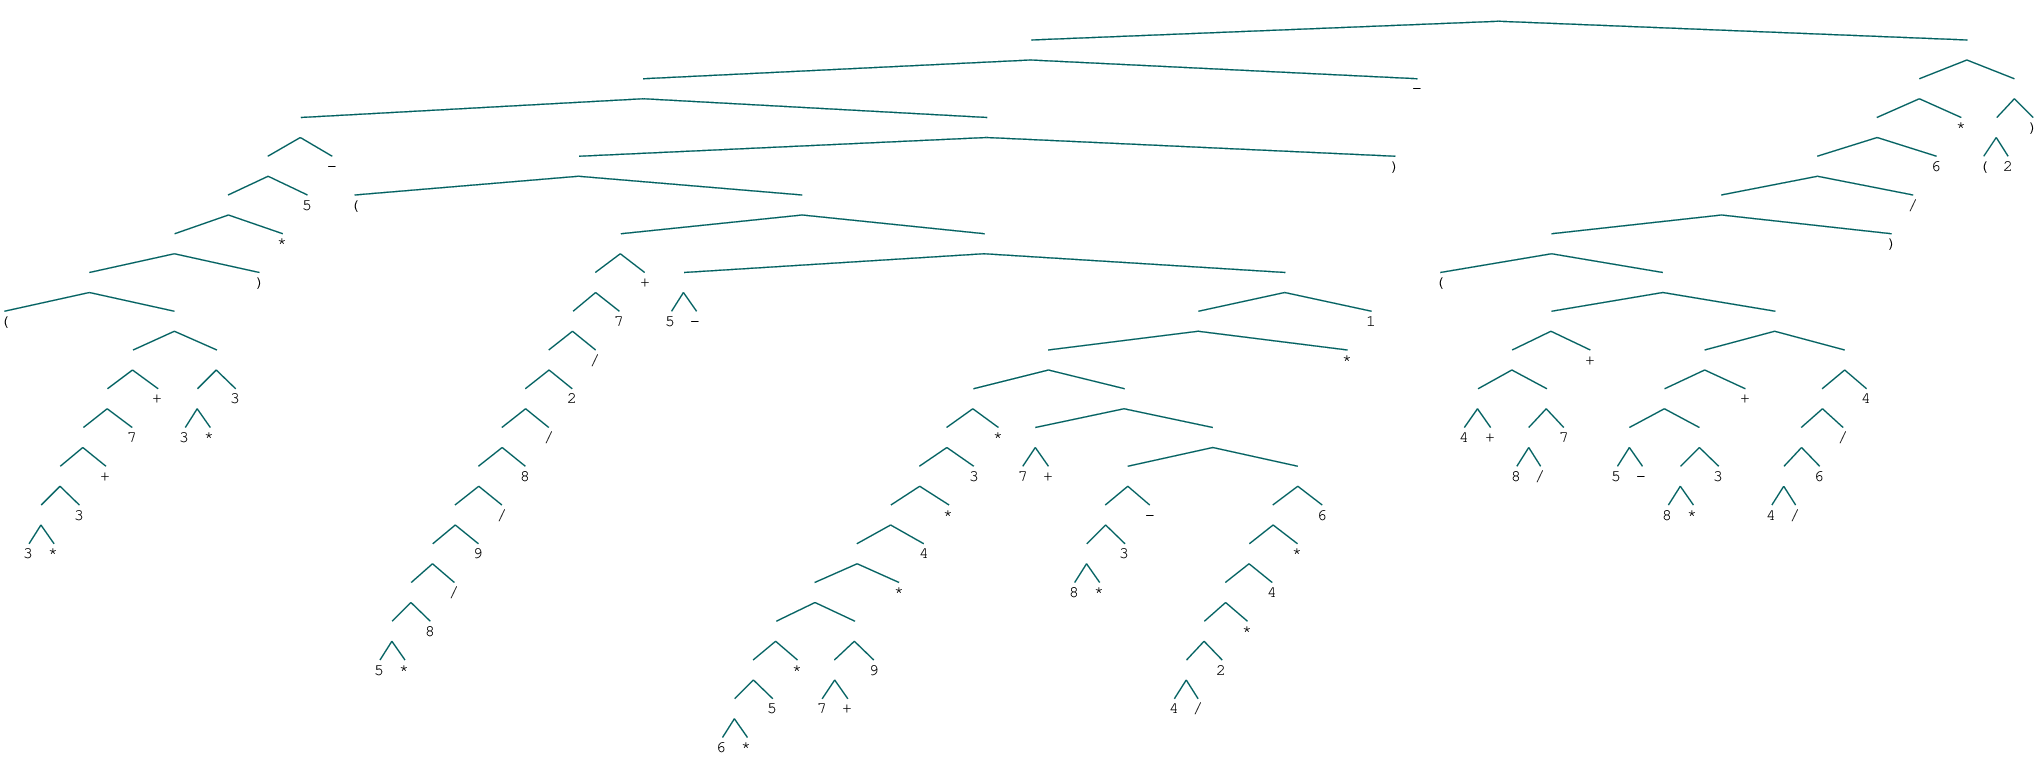

In [135]:
derive_etree(t)

只可能往右分两次

In [15]:
def derive_etree(etree):
    if not isinstance(etree, tuple) and not isinstance(etree, list):
        return etree
    
    l, r = etree
    n_l = derive_etree(l)
    n_r = derive_etree(r)
    
    return Tree('', [n_l, n_r])

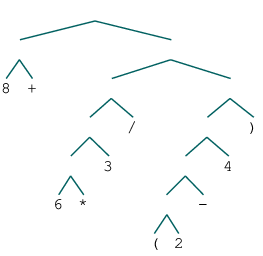

In [18]:
etree = ((8,'+'),(((((6, '*'), 3), '/'), ((((('(', 2), '-'), 4),')')))))
derive_etree(etree)

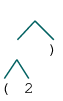

In [19]:
etree = [['(', 2], ')']
derive_etree(etree)

In [ ]:
ds = [5, 6, ]

In [46]:
cf = CanvasFrame()
tc = TreeWidget(cf.canvas(), t)
tc['node_color'] = '#005990'
tc['leaf_color'] = '#3F8F57'
tc['line_color'] = '#175252'
cf.add_widget(tc, 40, 10) # (10,10) offsets
cf.print_to_file('tree.ps')
cf.destroy()

In [47]:
t = Tree(1, [Tree(2,[3]),3])

In [48]:
t.label()

1

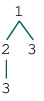

In [49]:
t

In [50]:
type(t)

nltk.tree.Tree

In [51]:
sd_lst = [1, 2, 3, 4, 5, 6, 1, 2]

In [71]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [72]:
seq = ['6', '*', '5', '+', '7', '+', '1', '/', '9']
seq_len = len(seq)

In [110]:
ds_disp = np.exp(np.array(sd_lst).astype('float') ** (0.3)) - 2.5
print(ds_disp)

[0.21828183 0.92514708 1.51641282 2.05268226 2.55640925 3.03875563
 0.21828183 0.92514708]


In [133]:
ds_disp = np.array(sd_lst)/max(np.array(sd_lst))*0.5

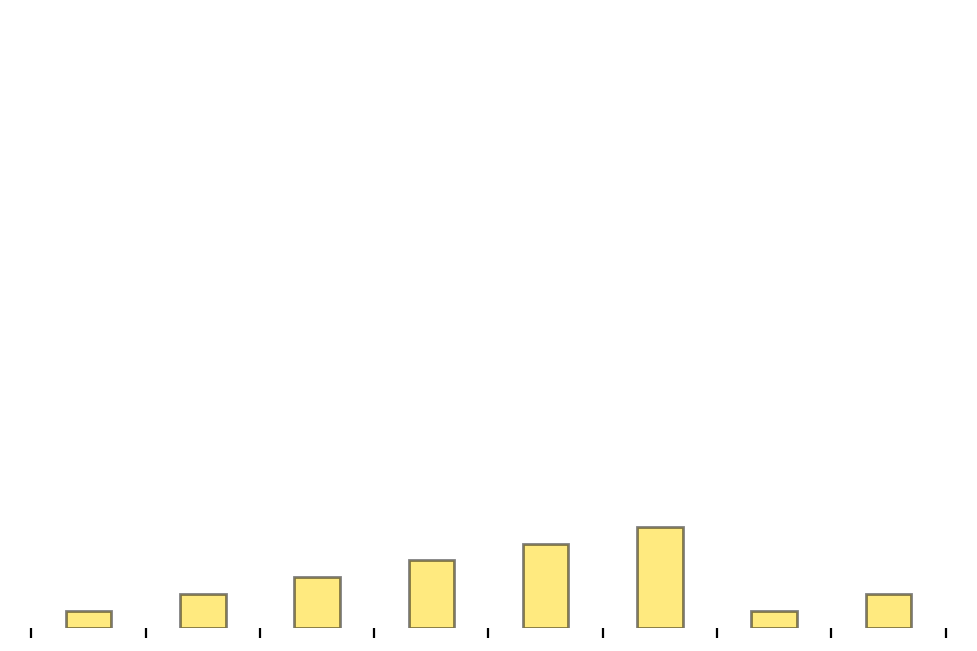

In [139]:
fig, ax = plt.subplots()
fig.dpi = 200
plt.bar(np.arange(0.5, seq_len-0.5), ds_disp,
        width=0.4, color='gold', alpha=0.5, edgecolor='black')
# plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.xticks(np.arange(0, seq_len, 1), ['' for _ in seq])
# plt.yticks(np.arange(1, 3), ['',''])
plt.yticks([])
plt.ylim([0,3])
# plt.grid(linestyle = "--", axis='x') 
plt.ylabel('')
ax = plt.gca() # 获取当前的axes
ax.spines['left'].set_visible(False)  #去掉上边框
ax.spines['bottom'].set_visible(False) #去掉右边框
ax.spines['top'].set_visible(False) #去掉右边框
ax.spines['right'].set_visible(False) #去掉右边框
# ax.set_visible()

In [1]:
import nltk
from nltk import Tree
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget

OP_MAP = ['+', '-', '*', '/']

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [41]:
sd_lst = [1, 5, 1,2, 3, 4, 6, 7]
seq = ['6', '*', '5', '+', '7', '+', '1', '/', '9']
seq_len = len(seq)
ds_disp = np.array(sd_lst)/max(np.array(sd_lst))*0.5

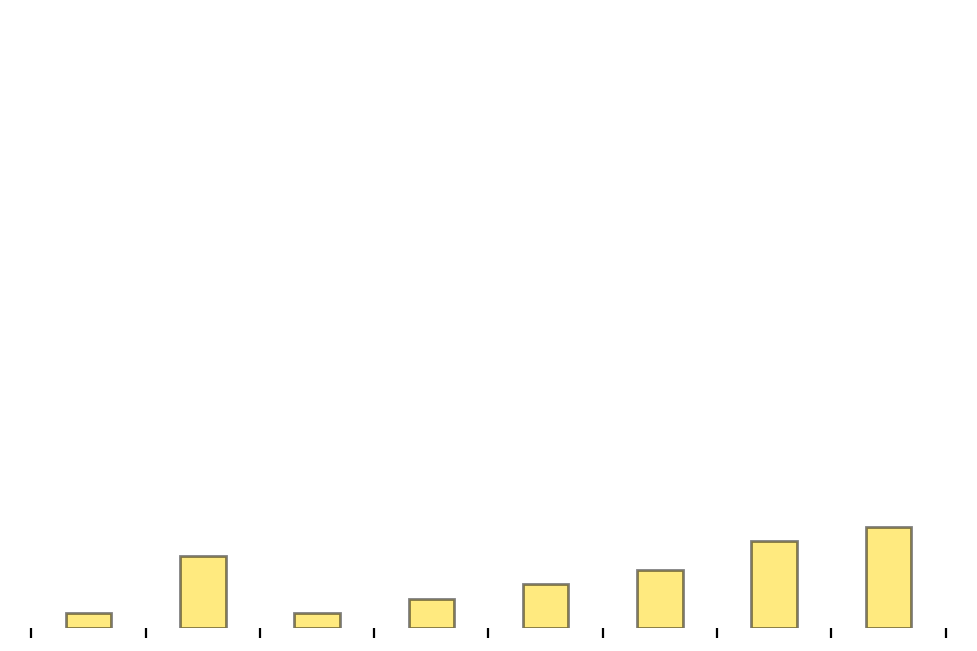

In [42]:
fig, ax = plt.subplots()
fig.dpi = 200
plt.bar(np.arange(0.5, seq_len-0.5), ds_disp,
        width=0.4, color='gold', alpha=0.5, edgecolor='black')
# plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.xticks(np.arange(0, seq_len, 1), ['' for _ in seq])
# plt.yticks(np.arange(1, 3), ['',''])
plt.yticks([])
plt.ylim([0,3])
# plt.grid(linestyle = "--", axis='x') 
plt.ylabel('')
ax = plt.gca() # 获取当前的axes
ax.spines['left'].set_visible(False)  #去掉上边框
ax.spines['bottom'].set_visible(False) #去掉右边框
ax.spines['top'].set_visible(False) #去掉右边框
ax.spines['right'].set_visible(False) #去掉右边框
# ax.set_visible()